In [1]:
from ultralytics import YOLO
import torch
from util import preprocess_image, compare_original_and_adversarial
from attacks import disappearance_dag_attack

In [2]:
# Load YOLOv8 model
underlying_model = YOLO('yolov8n_road.pt').model  # Access the underlying PyTorch model
underlying_model.eval()  # Set to evaluation mode

# Freeze model parameters (no training, only input gradient needed)
for param in underlying_model.parameters():
    param.requires_grad = False

model = YOLO('yolov8n_road.pt')
image_path = 'im2.jpg'

image = preprocess_image(image_path)
conf_threshold = 0.5
image.requires_grad_(True)  # Enable gradients for adversarial attack
original_image = image.clone().detach()
original_pred = model(image,conf=0.5)
detected_ids = [int(box.cls[0].item()) for box in original_pred[0].boxes]


0: 640x640 2 cars, 1 trafficLight-Green, 1 truck, 217.2ms
Speed: 0.2ms preprocess, 217.2ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)


In [3]:
adversarial_image = disappearance_dag_attack(underlying_model, model, image, epsilon=0.03, alpha=0.1, lambda_reg=0.01, num_iter=100, confidence_threshold=conf_threshold)


0: 640x640 2 cars, 1 trafficLight-Green, 1 truck, 514.7ms
Speed: 0.0ms preprocess, 514.7ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)
Original detections: {1, 10, 4}

0: 640x640 2 cars, 172.9ms
Speed: 0.0ms preprocess, 172.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Iteration 1, Detections: {1}

0: 640x640 3 cars, 1 truck, 150.3ms
Speed: 0.0ms preprocess, 150.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Iteration 2, Detections: {1, 10}

0: 640x640 3 cars, 1 truck, 164.8ms
Speed: 0.0ms preprocess, 164.8ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Iteration 3, Detections: {1, 10}

0: 640x640 4 cars, 233.6ms
Speed: 0.0ms preprocess, 233.6ms inference, 7.7ms postprocess per image at shape (1, 3, 640, 640)
Iteration 4, Detections: {1}

0: 640x640 1 car, 1 truck, 173.4ms
Speed: 0.0ms preprocess, 173.4ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)
Iteration 5, Detections: {1, 10

original_pred: 
image 1/1 /home/salma/graduation_project/YOLO/yolov8/im2.jpg: 640x640 2 cars, 1 trafficLight-Green, 1 truck, 304.4ms
Speed: 6.6ms preprocess, 304.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/original_pred
adversarial_pred: 
image 1/1 /home/salma/graduation_project/YOLO/yolov8/adversarial_image.png: 640x640 (no detections), 203.0ms
Speed: 3.8ms preprocess, 203.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/adversarial_pred
Original prediction found: runs/detect/original_pred/im2.jpg
Adversarial prediction found: runs/detect/adversarial_pred/adversarial_image.jpg


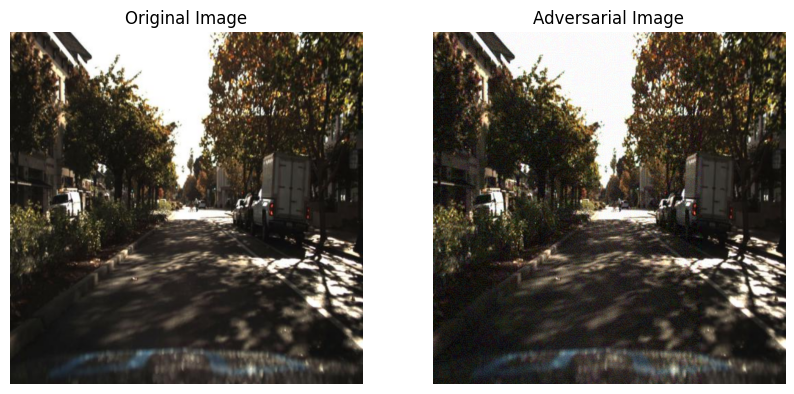

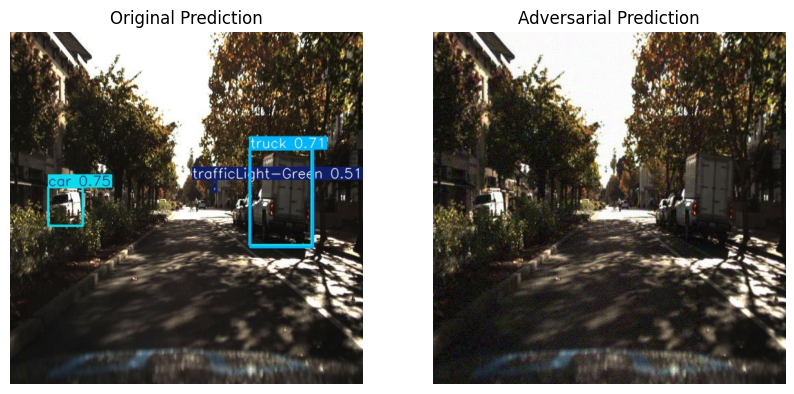

In [4]:
compare_original_and_adversarial(model, image_path, adversarial_image,conf_threshold)